In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#Load The Dataset That is on .excel FIle 
data=pd.read_csv('/content/drive/My Drive/project/Dataset/loan_prediction.csv')

In [4]:
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#Tail() Is Used the Show the first 5 Rows Of the Dataset 
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#Attributes For Each Columns 
data.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
#Check The Shape Of The Dataset 
data.shape

(614, 13)

In [8]:
#Here Check the datatype for each attribute or column 
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
#Here Get the information for each attribute of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#Check the Null Values of each rows in the dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

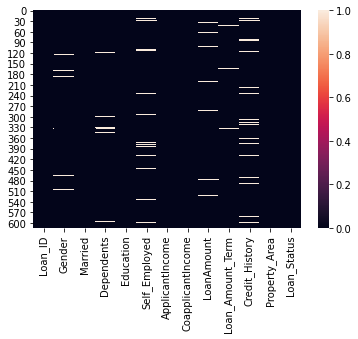

In [11]:
#This is the heatmap that's show the NULL Value is having or not 
sns.heatmap(data.isnull())

In [12]:
data['LoanAmount'].fillna(data['LoanAmount'].mean(), inplace = True)

In [13]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean(), inplace = True)

In [14]:
data=data.dropna()

In [15]:
data.shape

(511, 13)

In [16]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

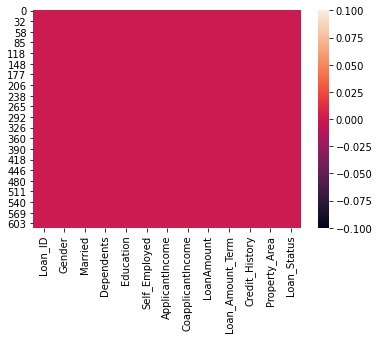

In [17]:
sns.heatmap(data.isnull())

In [18]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['ApplicantIncome'], dtype='object')

In [20]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History'],
      dtype='object')

In [21]:
data[Numerical].describe()#Describe the dataset Column Value 

,ApplicantIncome
count,511.000000
mean,5308.146771
std,5561.209487
min,150.000000
25%,2885.500000
50%,3858.000000
75%,5820.000000
max,81000.000000


In [22]:
data[Float].describe()#Describe the dataset Column Value 

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,511.000000,511.000000,511.000000,511.000000
mean,1561.997886,144.220804,342.011742,0.843444
std,2559.383166,78.266321,64.092763,0.363738
min,0.000000,9.000000,36.000000,0.000000
25%,0.000000,100.000000,360.000000,1.000000
50%,1086.000000,129.000000,360.000000,1.000000
75%,2253.500000,165.500000,360.000000,1.000000
max,33837.000000,600.000000,480.000000,1.000000


# Visualisation of Graphs For Catagorical data

> Indented block



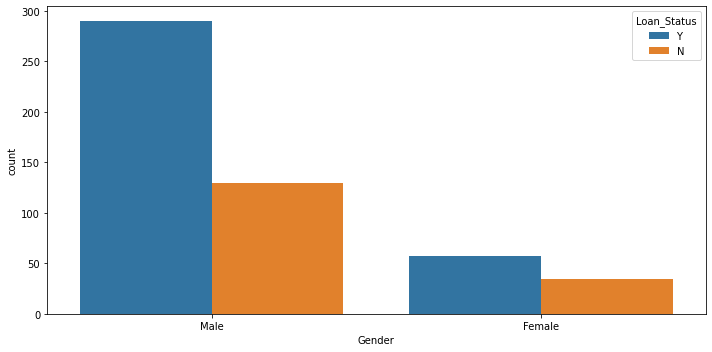

In [23]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Gender', hue='Loan_Status', data=data)
plt.tight_layout()
plt.show()

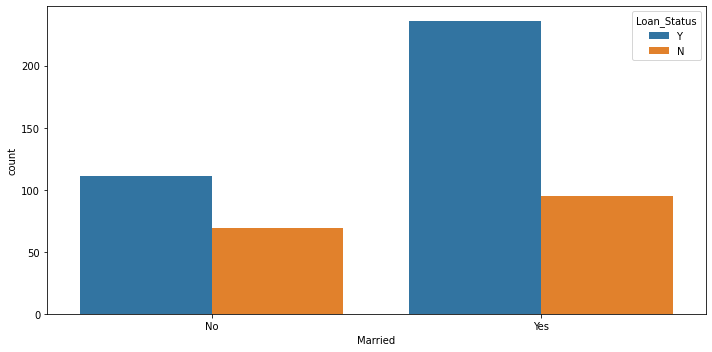

In [24]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Married', hue='Loan_Status', data=data)
plt.tight_layout()
plt.show()

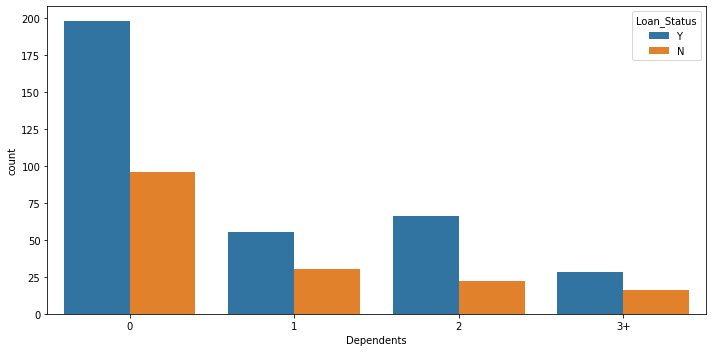

In [25]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Dependents', hue='Loan_Status', data=data)
plt.tight_layout()
plt.show()

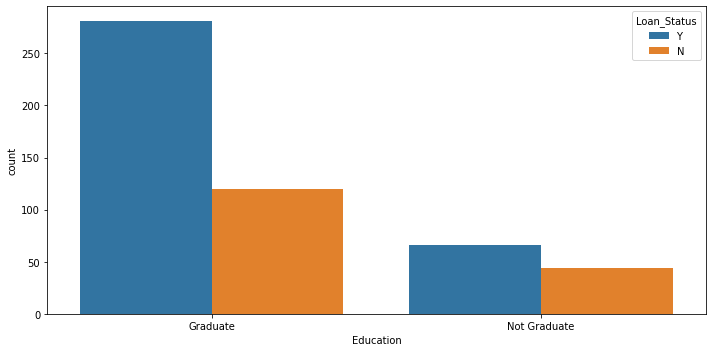

In [26]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Education', hue='Loan_Status', data=data)
plt.tight_layout()
plt.show()

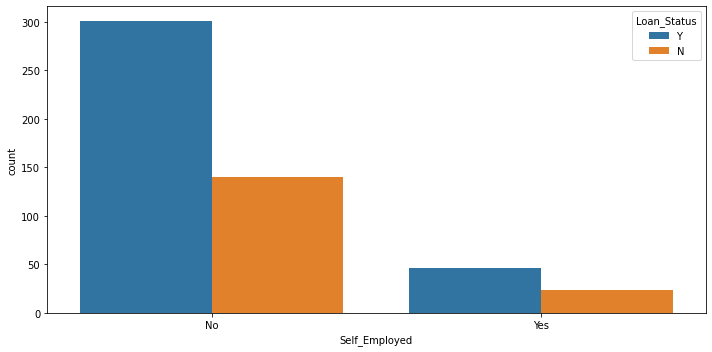

In [27]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Self_Employed', hue='Loan_Status', data=data)
plt.tight_layout()
plt.show()

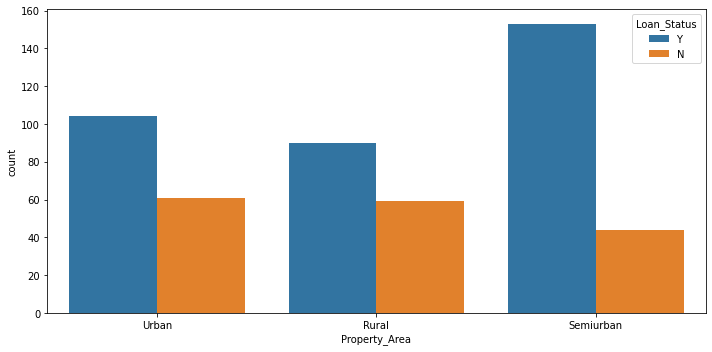

In [28]:
fig = plt.figure(figsize=(10,5))
sns.countplot('Property_Area', hue='Loan_Status', data=data)
plt.tight_layout()
plt.show()

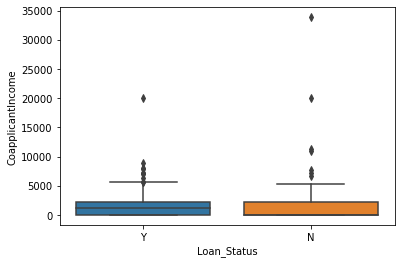

In [29]:
sns.boxplot(y='CoapplicantIncome',x='Loan_Status',data=data)

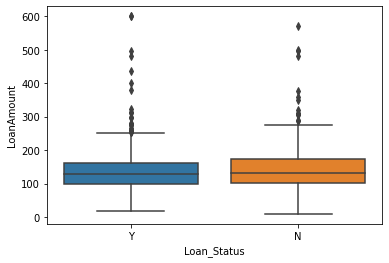

In [30]:
sns.boxplot(y='LoanAmount',x='Loan_Status',data=data)

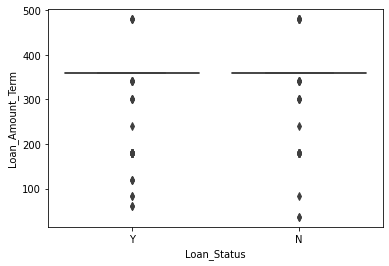

In [31]:
sns.boxplot(y='Loan_Amount_Term',x='Loan_Status',data=data)

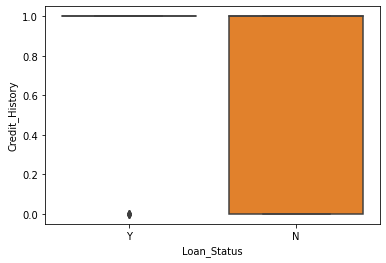

In [32]:
sns.boxplot(y='Credit_History',x='Loan_Status',data=data)

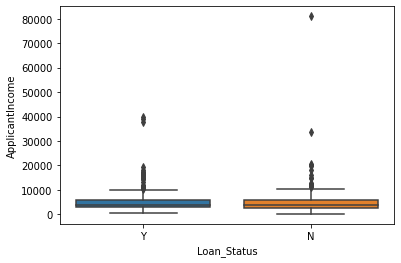

In [33]:
sns.boxplot(y='ApplicantIncome',x='Loan_Status',data=data)

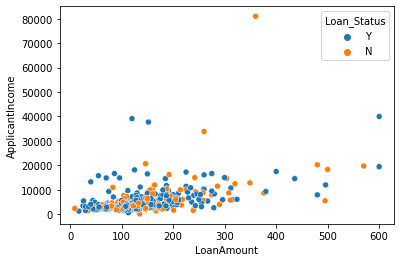

In [34]:
sns.scatterplot(x='LoanAmount',y='ApplicantIncome',hue='Loan_Status',data=data)#Plot the Graph 

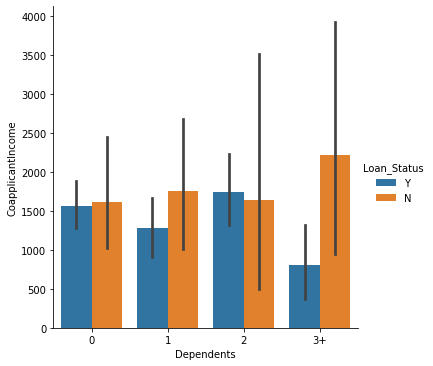

In [35]:
sns.catplot(x='Dependents',y='CoapplicantIncome',hue='Loan_Status',kind='bar',data=data)

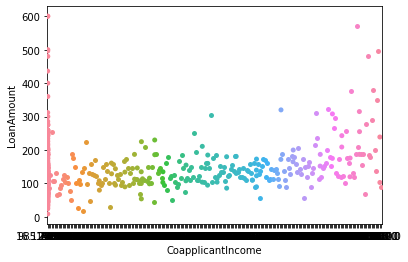

In [36]:
sns.stripplot(y="LoanAmount",x="CoapplicantIncome",data=data)

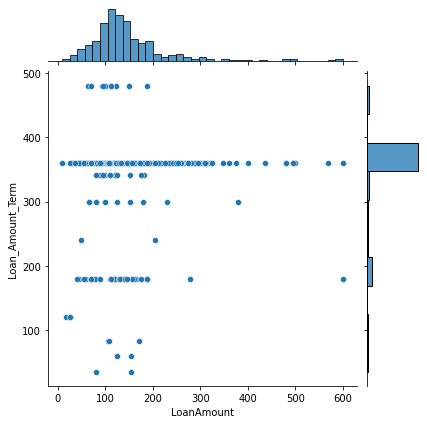

In [37]:
sns.jointplot(x='LoanAmount',y='Loan_Amount_Term',data=data)

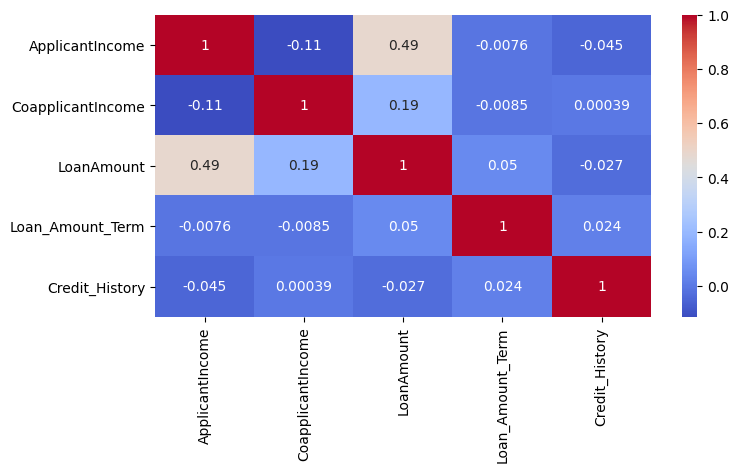

In [38]:
corr_df = data.corr(method='pearson')
plt.figure(figsize=(8,4),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

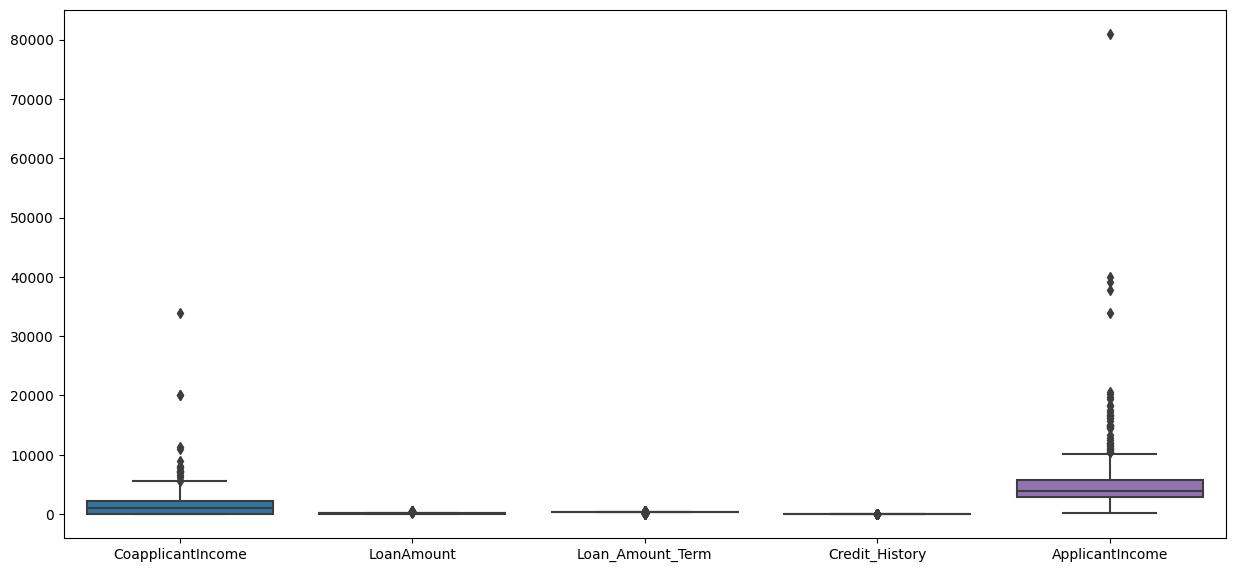

In [39]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = data[['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History','ApplicantIncome']])

# Label Encoder 

In [40]:
from sklearn import preprocessing#Label Encoder is use to convert string column value into integer 
lb=preprocessing.LabelEncoder()

In [41]:
data['Gender']=lb.fit_transform(data['Gender'])
data['Loan_ID']=lb.fit_transform(data['Loan_ID'])
data['Married']=lb.fit_transform(data['Married'])
data['Dependents']=lb.fit_transform(data['Dependents'])
data['Education']=lb.fit_transform(data['Education'])
data['Self_Employed']=lb.fit_transform(data['Self_Employed'])
data['Property_Area']=lb.fit_transform(data['Property_Area'])
data['Loan_Status']=lb.fit_transform(data['Loan_Status'])

In [42]:
data['Gender'].unique()

array([1, 0])

In [43]:
data['Married'].unique()

array([0, 1])

In [44]:
data['Dependents'].unique()

array([0, 1, 2, 3])

In [45]:
data['Education'].unique()

array([0, 1])

In [46]:
data['Self_Employed'].unique()

array([0, 1])

In [47]:
data['Property_Area'].unique()

array([2, 0, 1])

In [48]:
data['Loan_Status'].unique()

array([1, 0])

In [49]:
data.skew()

Loan_ID              0.000000
Gender              -1.687828
Married             -0.620447
Dependents           0.964127
Education            1.389640
Self_Employed        2.117792
ApplicantIncome      6.944483
CoapplicantIncome    5.930087
LoanAmount           2.429971
Loan_Amount_Term    -2.369259
Credit_History      -1.895838
Property_Area       -0.054992
Loan_Status         -0.769382
dtype: float64

# Outliers Detection With the help of box Plot

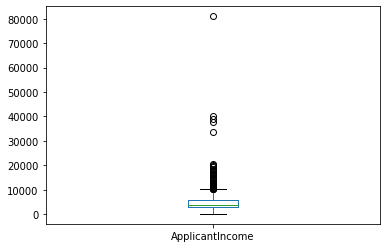

In [50]:
data['ApplicantIncome'].plot.box()

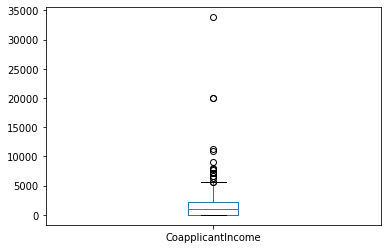

In [51]:
data['CoapplicantIncome'].plot.box()

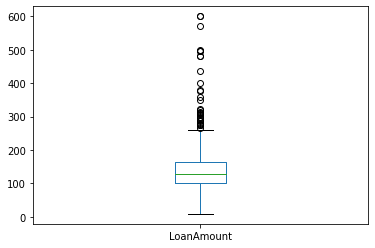

In [52]:
data['LoanAmount'].plot.box()

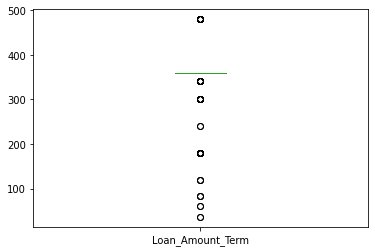

In [53]:
data['Loan_Amount_Term'].plot.box()

In [54]:
data.shape

(511, 13)

In [55]:
from scipy import stats #Z-Score used to remove the Outliers 
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[1.72866459 0.46547467 1.35605637 ... 0.43083042 1.23673501 0.68747544]
 [1.72188551 0.46547467 0.73743247 ... 0.43083042 1.31668555 1.45459742]
 [1.71510643 0.46547467 0.73743247 ... 0.43083042 1.23673501 0.68747544]
 ...
 [1.71510643 0.46547467 0.73743247 ... 0.43083042 1.23673501 0.68747544]
 [1.72188551 0.46547467 0.73743247 ... 0.43083042 1.23673501 0.68747544]
 [1.72866459 2.14834462 1.35605637 ... 2.32109888 0.03997527 1.45459742]]


In [56]:
threshold = 3 #Set the threshold Values 
print(np.where(z > 3))

(array([  9,  13,  60,  83, 110, 132, 132, 150, 150, 155, 157, 204, 222,
       237, 263, 308, 311, 335, 342, 349, 373, 407, 413, 436, 438, 454,
       468, 480, 484, 487, 501]), array([7, 9, 9, 9, 9, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 8, 8, 7, 6, 7, 6, 8,
       9, 8, 8, 9, 8, 9, 7, 9, 8]))


In [57]:
data= data[(z < 3).all(axis=1)]

In [58]:
data.skew()

Loan_ID              0.014297
Gender              -1.666661
Married             -0.599500
Dependents           1.003054
Education            1.342091
Self_Employed        2.225448
ApplicantIncome      2.127928
CoapplicantIncome    1.345582
LoanAmount           1.000741
Loan_Amount_Term    -2.059336
Credit_History      -1.863184
Property_Area       -0.058816
Loan_Status         -0.797253
dtype: float64

In [59]:
data.shape

(482, 13)

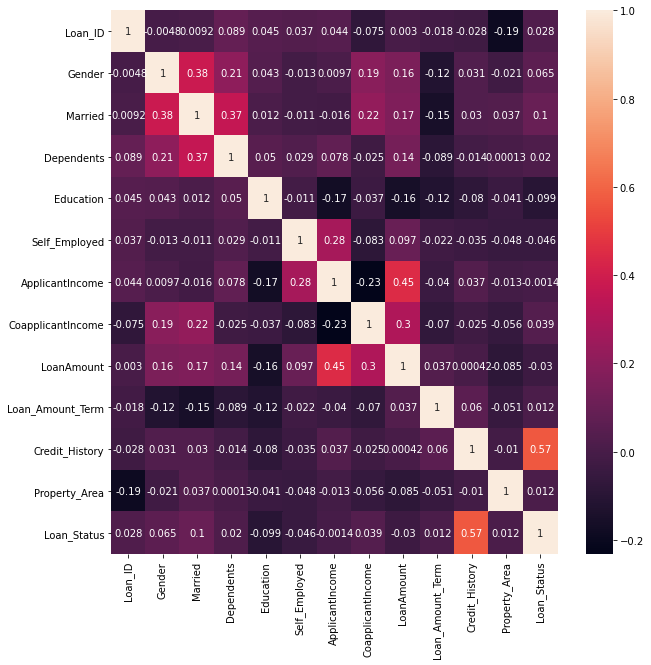

In [60]:
plt.figure(figsize = (10,10))
sns.heatmap(data.corr(), annot = True, )
plt.show()

In [61]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [62]:
x=data[['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',]].copy()

In [63]:
x.shape

(482, 12)

In [64]:
y=data['Loan_Status']

In [65]:
y.shape

(482,)

In [66]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesClassifier 
selection = ExtraTreesClassifier()
selection=selection.fit(x, y)

In [67]:
print(selection.feature_importances_)

[0.12757359 0.02099037 0.02341333 0.05534647 0.02187237 0.01865038
 0.12915432 0.08426587 0.12333442 0.04453792 0.29287054 0.05799041]


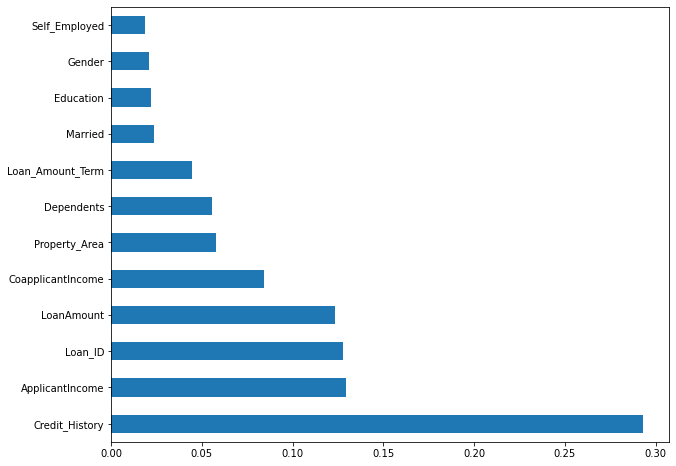

In [68]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [69]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(selection, prefit=True)
x = selector.transform(x)

In [70]:
x.shape

(482, 5)

In [71]:
y=y.values.reshape(-1,1)

In [72]:
y.shape

(482, 1)

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.70,test_size=0.30,random_state=42)

In [74]:
x_train.shape

(337, 5)

In [75]:
x_test.shape

(145, 5)

In [76]:
y_train.shape

(337, 1)

In [77]:
y_test.shape

(145, 1)

In [78]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=5)
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [79]:
pred=lr.predict(x_test)#Pred
print(' prediction \n',pred)#Print Prediction Value 
lr=print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
accuracy score
 0.8482758620689655
confusion metrix
 [[ 19   1]
 [ 21 104]]
classification Report 
               precision    recall  f1-score   support

           0       0.47      0.95      0.63        20
           1       0.99      0.83      0.90       125

    accuracy                           0.85       145
   macro avg       0.73      0.89      0.77       145
weighted avg       0.92      0.85      0.87       145



In [80]:
from sklearn.naive_bayes import GaussianNB 
gn=GaussianNB()
gn.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
pred=gn.predict(x_test)
print(' prediction \n',pred)
print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
accuracy score
 0.8482758620689655
confusion metrix
 [[ 19   1]
 [ 21 104]]
classification Report 
               precision    recall  f1-score   support

           0       0.47      0.95      0.63        20
           1       0.99      0.83      0.90       125

    accuracy                           0.85       145
   macro avg       0.73      0.89      0.77       145
weighted avg       0.92      0.85      0.87       145



In [82]:
from sklearn.neighbors import KNeighborsClassifier#KNN ALgorithem to learn the model for prediction 
knc = KNeighborsClassifier(n_neighbors=49)
knc.fit(x_train, y_train)#Fit the model 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [83]:
pred=knc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
knc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy score
 0.7241379310344828
confusion metrix
 [[  0   0]
 [ 40 105]]
classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.72      0.84       145

    accuracy                           0.72       145
   macro avg       0.50      0.36      0.42       145
weighted avg       1.00      0.72      0.84       145



In [84]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [85]:
pred=svc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
svc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy score
 0.7241379310344828
confusion metrix
 [[  0   0]
 [ 40 105]]
classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.72      0.84       145

    accuracy                           0.72       145
   macro avg       0.50      0.36      0.42       145
weighted avg       1.00      0.72      0.84       145



In [86]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
pred=tree.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
tree=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0
 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1]
accuracy score
 0.7241379310344828
confusion metrix
 [[23 23]
 [17 82]]
classification Report 
               precision    recall  f1-score   support

           0       0.57      0.50      0.53        46
           1       0.78      0.83      0.80        99

    accuracy                           0.72       145
   macro avg       0.68      0.66      0.67       145
weighted avg       0.72      0.72      0.72       145



In [88]:
from sklearn.ensemble import RandomForestClassifier
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=14, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
pred=b.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
b=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]
accuracy score
 0.8413793103448276
confusion metrix
 [[ 20   3]
 [ 20 102]]
classification Report 
               precision    recall  f1-score   support

           0       0.50      0.87      0.63        23
           1       0.97      0.84      0.90       122

    accuracy                           0.84       145
   macro avg       0.74      0.85      0.77       145
weighted avg       0.90      0.84      0.86       145



In [90]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(max_samples=0.5,max_features=0.5)
bagging.fit(x_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=0.5, max_samples=0.5, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [91]:
pred=bagging.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
bagging=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 0
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
accuracy score
 0.7448275862068966
confusion metrix
 [[12  9]
 [28 96]]
classification Report 
               precision    recall  f1-score   support

           0       0.30      0.57      0.39        21
           1       0.91      0.77      0.84       124

    accuracy                           0.74       145
   macro avg       0.61      0.67      0.62       145
weighted avg       0.83      0.74      0.77       145



In [92]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=200,learning_rate=.02)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [93]:
pred=GBC.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
GBC=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1]
accuracy score
 0.8275862068965517
confusion metrix
 [[ 20   5]
 [ 20 100]]
classification Report 
               precision    recall  f1-score   support

           0       0.50      0.80      0.62        25
           1       0.95      0.83      0.89       120

    accuracy                           0.83       145
   macro avg       0.73      0.82      0.75       145
weighted avg       0.87      0.83      0.84       145



In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [95]:
score=cross_val_score(gn,x,y,cv=5,scoring='accuracy')
print('score of mean \n',score.mean())
print('score of standard devition \n',score.std())
y_pred=cross_val_predict(gn,x,y,cv=5)
print('prediction \n',y_pred)
confu=confusion_matrix(y,y_pred)
print('confusion matrix \n',confu)

score of mean 
 0.8112328178694158
score of standard devition 
 0.03837238045884858
prediction 
 [1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1
 1 

In [96]:
from sklearn.externals import joblib
joblib.dump(data,'fraud.pkl')

['fraud.pkl']